In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Read the dataset to the python environment.


In [3]:
df= pd.read_excel("E:\ICTAK-DSA\iris.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Do necessary pre-processing steps.

In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Checking and Replacing Missing Values 

In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
for i in ['SL', 'SW', 'PL']:
    df[i] = df[i].fillna(df[i].mean())

In [16]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outlier Analysis

Text(0.5, 1.0, 'Boxplot of Sepal Length')

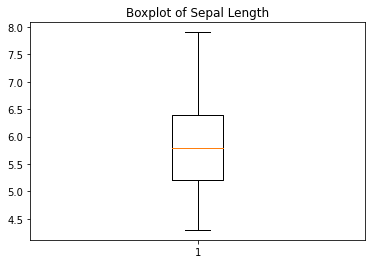

In [17]:
plt.boxplot(df['SL'])
plt.title('Boxplot of Sepal Length')

Text(0.5, 1.0, 'Boxplot of Sepal Width')

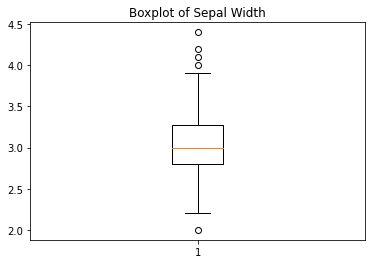

In [22]:
plt.boxplot(df['SW'])
plt.title('Boxplot of Sepal Width')

Text(0.5, 1.0, 'Boxplot of Petal Length')

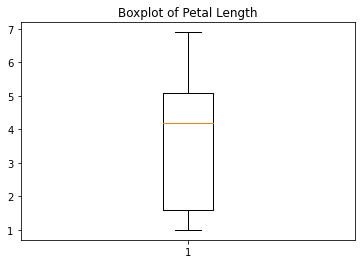

In [23]:
plt.boxplot(df['PL'])
plt.title('Boxplot of Petal Length')

Text(0.5, 1.0, 'Boxplot of Petal Width')

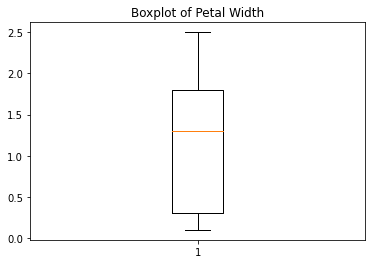

In [24]:
plt.boxplot(df['PW'])
plt.title('Boxplot of Petal Width')

Handling Outlier

In [25]:
Q1_SW = df['SW'].quantile(.25)
Q1_SW

2.8

In [27]:
Q2_SW = df['SW'].quantile(.50)
Q2_SW

3.0

In [28]:
Q3_SW = df['SW'].quantile(.75)
Q3_SW

3.275

Finding the Interquartile Range


In [29]:
IQR_SW = Q3_SW-Q1_SW
IQR_SW

0.4750000000000001

Finding lower Limit

In [30]:
low_limit = Q1_SW-1.5*IQR_SW
low_limit

2.0874999999999995

Finding Upper Limit

In [31]:
up_limit = Q3_SW+1.5*IQR_SW
up_limit

3.9875

Finding Outlier Data

In [32]:
SW_outlier= df[(df['SW'] < low_limit ) | (df['SW'] > up_limit )]
SW_outlier

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [33]:
df.drop([14, 15, 32, 33,60], inplace=True)

# 3. Find out which classification model gives the best result to predict iris species.

<AxesSubplot:>

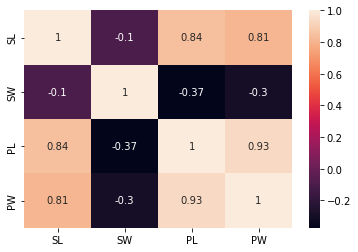

In [34]:
df.corr()
sns.heatmap(df.corr(),annot=True)

Splitting the dataset

In [35]:
x = df.drop('Classification', axis=1)
y = df['Classification']

In [38]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 42, test_size = 0.2)
print(len(xtrain),len(xtest),len(ytrain),len(ytest))

116 29 116 29


Logistic Regression

In [54]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(xtrain, ytrain)
ypred = logit_model.predict(xtest)


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score,  f1_score
print("Accuracy is: ", accuracy_score(ytest,ypred))
print("F1 score is: ", f1_score(ytest,ypred,average = 'micro'))
confusion_matrix(ytest,ypred)

Accuracy is:  0.896551724137931
F1 score is:  0.896551724137931


array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier


acc_values = []
neighbors = np.arange(1,10)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    model = classifier.fit(xtrain, ytrain)
    pred = model.predict(xtest)
    acc = accuracy_score(ytest, pred)
    acc_values.append(acc)
print(acc_values)


[0.896551724137931, 0.8620689655172413, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.9310344827586207, 0.896551724137931, 0.9310344827586207]


Text(0, 0.5, 'Accuracy Score')

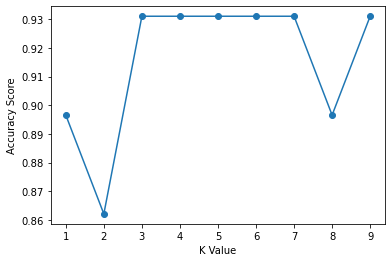

In [47]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [52]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
model = classifier.fit(xtrain, ytrain)
pred = model.predict(xtest)
print('Accuracy', accuracy_score(ytest, pred))
print("F1 score is: ", f1_score(ytest,ypred,average = 'micro'))
confusion_matrix(ytest, pred)


Accuracy 0.9310344827586207
F1 score is:  0.896551724137931


array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(xtrain, ytrain)
pred = model.predict(xtest)
print('Accuracy ', accuracy_score(ytest, pred))
print("F1 score is: ", f1_score(ytest,ypred,average = 'micro'))
print(confusion_matrix(ytest, pred))

Accuracy  0.9310344827586207
F1 score is:  0.896551724137931
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Conclusion: Since all the classification models gave very high accuracy and f1 score, all of them are very good in predicting iris species.